In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
from ipywidgets import *
np.set_printoptions(precision=3, suppress=True, linewidth=100)


In [2]:
def plotLayout(ax,xlim,ylim,title,xlab,ylab):
    # prepares a plot layout
    # Where:
    #- axis ax: figures axis
    #- param xlim: (xmin,xmax)x range of plot
    #- param ylim: (ymin,ymax)y range of plot

    #   Refine plot
    ax.grid(True)
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_title(title)
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)

In [3]:
#import needed: numpy, pyplot, plotLayout
def nd_orbit(fnct, x0, it):
    # calculates orbits of n dimensional map
    # Where:
    #- param fnct: Mapping function mapping x0 to x1 taking a single parameter
    #- param x0: Initial value
    #- param it: Number of iterations
    #- returns: The entire orbit, including the initial value
    #   Initialize
    orbit = np.zeros((len(x0),it))
    orbit[:,0]=x0
    #   Main loop
    for i in range(it-1):
        orbit[:,i+1] = fnct(orbit[:,i])
    return orbit

In [4]:
def activation(x):
    #the actication  function f()
    #return (x+abs(x))/2 #ReLu
    #return 1/(1+np.exp(x)) #sigmoid (?)
    return np.tanh(x) #tanh

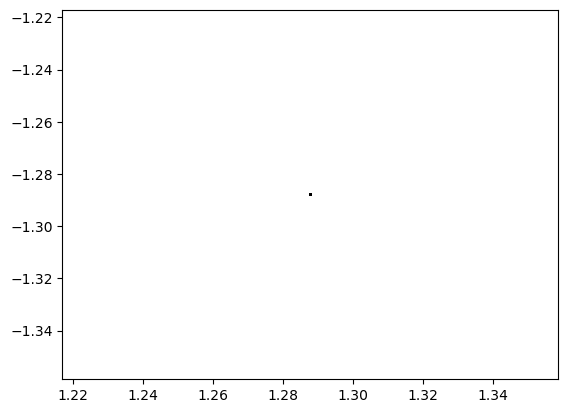

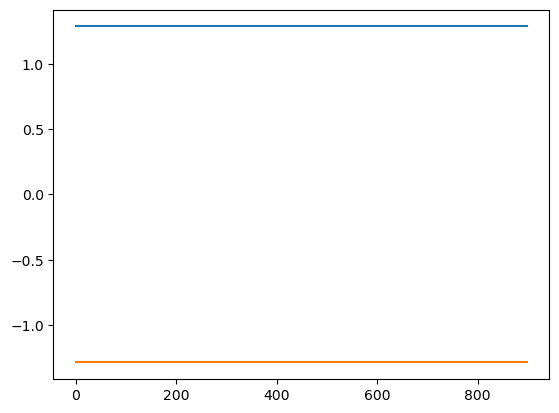

In [5]:
#import needed: numpy, pyplot, plotLayout, nd_orbit
def neuron_2_discrete(x0,a,b,alpha ,Nit, ntrans):
    # calculates stable solution henon map
    # Where:
    #- param x0: Initial value
    #- param a: Parameters of Henon map, being [a,b] in the standard expression
    #- returns: An array containing the orbit of the Henon map without transients

    #   Initialize  
    linearmap = lambda xy: alpha * (a @ activation(xy) + b)
    n_iter = Nit
    # n_steps_until_stable = 100

    #   Calculate orbit
    orbit = nd_orbit(linearmap, x0, n_iter)
    orbit = orbit[:, ntrans+1:] #remove the transient (+1 to also remove initial condition)
    return orbit

#Call the function henon_orbit_after_transients
alpha=1
x0 = -np.array([-0.1,0.1])
a = np.array([[1,-0.5],
              [-0.5,1]])
b=0
orbit = neuron_2_discrete(x0,a,b,alpha,1000,100)
fig, ax = plt.subplots(ncols=1)
ax.scatter(orbit[0,:],orbit[1,:],c='k',s=1)
plt.show()
plt.plot(orbit[0,:], label=r'$x_1(t)$')
plt.plot(orbit[1,:], label=r'$x_2(t)$')

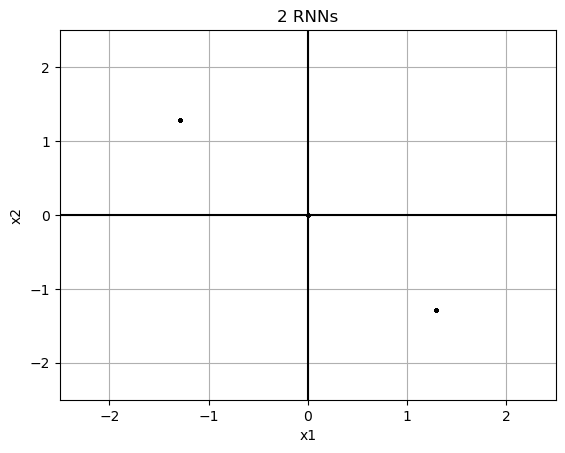

In [6]:
grid_size = 10
a = np.array([[1,-0.5],
              [-0.5,1]])
# b = np.array([0.,0.])
fig, ax = plt.subplots(ncols=1)
plotLayout(ax,[-2.5,2.5],[-2.5,2.5],'2 RNNs','x1','x2')

x_coords = np.linspace(-2, 2, grid_size)
y_coords = np.linspace(-2, 2, grid_size)

for x in x_coords:
    for y in y_coords:
        orbit = neuron_2_discrete([x,y],a,b, alpha,1000,100)

        ax.scatter(orbit[0,:],orbit[1,:],c='k',s=3)

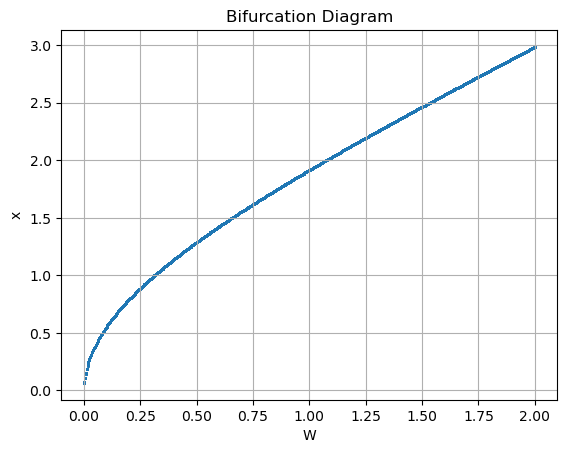

In [8]:
def bifurcation_diagram(weight_range, b, x0, steps=200, last_steps=50):
    x1_values = []
    weights = []
    for w in weight_range:
        W = np.array([[1, -w], [-w, 1]])  # Symmetric weight matrix
        x_values = neuron_2_discrete(x0, W, b,alpha, steps,last_steps)
        # Only take the last few steps to plot bifurcation points
        x1_values.extend(x_values[0, -last_steps:])
        weights.extend([w] * last_steps)
    
    plt.scatter(weights, x1_values, s=0.5)
    plt.xlabel("W")
    plt.ylabel('x')
    plt.title("Bifurcation Diagram")
    plt.grid()
    plt.show()
x0 = -np.array([-0.1,0.1])
weight_range = np.linspace(0, 2, 500)  # Range of weights to explore
bifurcation_diagram(weight_range, b, x0)

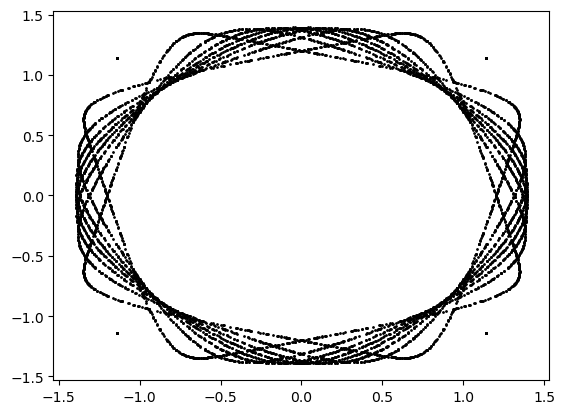

In [17]:
grid_size = 10
a = lambda theta: np.array([[np.cos(theta),np.sin(theta)],
                    [-np.sin(theta),np.cos(theta)]])
# b = np.array([0.,0.])
fig, ax = plt.subplots(ncols=1)
# plotLayout(ax,[-.5,.5],[-.5,.5],'2 RNNs','x1','x2')

x_coords = np.linspace(-2, 2, grid_size)
y_coords = np.linspace(-2, 2, grid_size)
thetas = np.linspace(0, 2* np.pi, grid_size)
for theta in thetas:
    for x in x_coords:
        for y in y_coords:
            
            orbit = neuron_2_discrete([x,y],a(theta),b,alpha,100,90)

            ax.scatter(orbit[0,:],orbit[1,:],c='k',s=1)

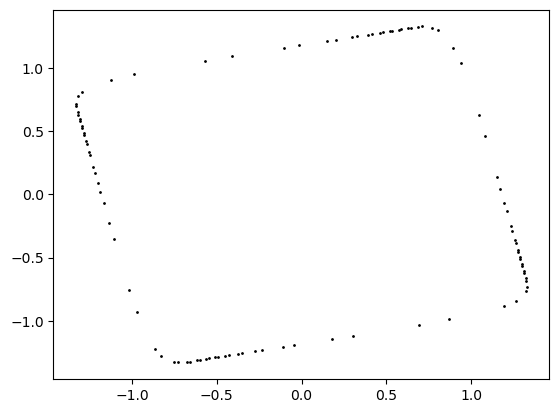

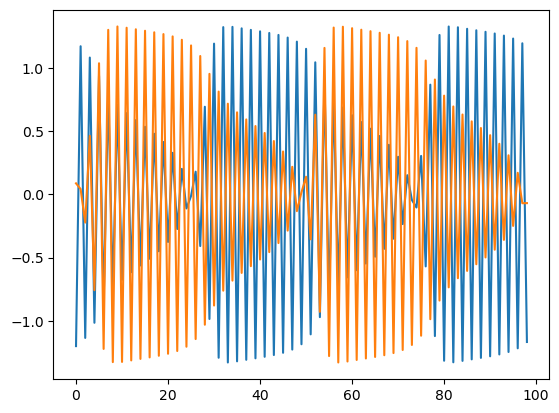

In [16]:
x0 = -np.array([0.1,0.1])
alpha = 1.4
orbit = neuron_2_discrete(x0,a(3),b,alpha,1000,900)
fig, ax = plt.subplots(ncols=1)
ax.scatter(orbit[0,:],orbit[1,:],c='k',s=1)
plt.show()
plt.plot(orbit[0,:], label=r'$x_1(t)$')
plt.plot(orbit[1,:], label=r'$x_2(t)$')
plotLayout(ax,[-2.5,2.5],[-2.5,2.5],'2 RNNs','x1','x2')


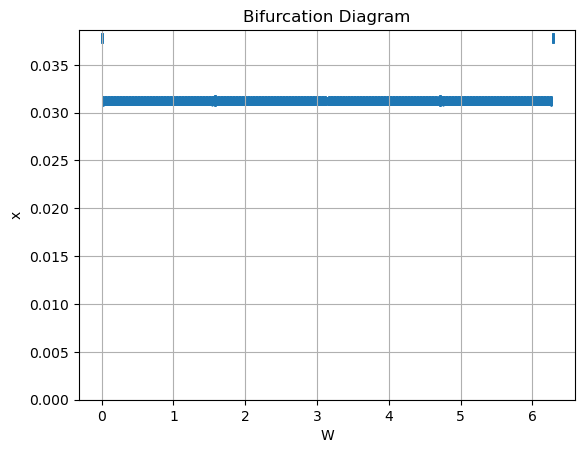

In [37]:
def bifurcation_diagram(thetas,a, b, x0, steps=2000, last_steps=100):
    x1_values = []
    weights = []
    for theta in thetas:
        
        x_values = neuron_2_discrete(x0, a(theta), b, steps,last_steps)
        x_values = np.linalg.norm(x_values,axis=0)
        # Only take the last few steps to plot bifurcation points
        x1_values.extend(x_values[ -last_steps:])
        weights.extend([theta] * last_steps)
    
    plt.scatter(weights, x1_values, s=0.5)
    plt.xlabel("W")
    plt.ylabel('x')
    plt.title("Bifurcation Diagram")
    plt.ylim(0)
    plt.grid()
    plt.show()
x0 = -np.array([-0.1,0.1])
a = lambda theta: np.array([[np.cos(theta),np.sin(theta)],
                    [-np.sin(theta),np.cos(theta)]])
thetas = np.linspace(0, 2* np.pi, 300)
  # Range of weights to explore
bifurcation_diagram(thetas,a, b, x0)